In [1]:
'''IMPORTS'''
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

### PART A

## EXERCISE 1

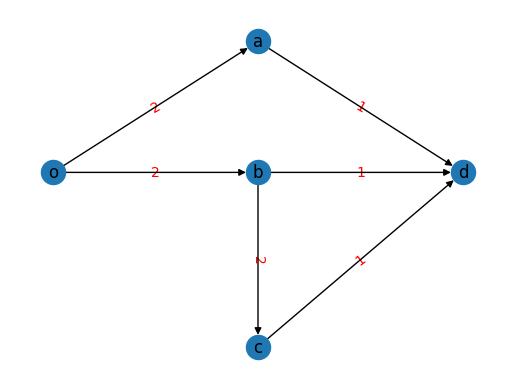

In [2]:
%matplotlib inline
G = nx.DiGraph()
G.add_edges_from([("o", "a"), ("a", "d"), ("o", "b"), ("b", "c"), ("b", "d"), ("c", "d")])
edge_labels = {("o", "a"):'2', ("a", "d"): '1', ("o", "b"):'2', ("b", "c"):'2', ("b", "d"):'1', ("c", "d"):'1' }
pos = {'o': (40, 20), 'a': (60, 35), 'b': (60, 20), 'd': (80, 20), 'c': (60, 0)}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color = 'red')
nx.draw(G, pos, with_labels=True)

#save graph object to file
plt.savefig("Graph.png", format="PNG")

In [3]:
#we define the capacity of the edges
G['o']['a']['capacity'] = 2
G['a']['d']['capacity'] = 1
G['o']['b']['capacity'] = 2
G['b']['d']['capacity'] = 1
G['b']['c']['capacity'] = 2
G['c']['d']['capacity'] = 1

In [4]:
min_cut, subsets = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
#we want the min cut capacity:
print(min_cut)
subset_U = list(subsets[0])
subset_V = list(subsets[1])
print(subsets)

3
({'a', 'b', 'o', 'c'}, {'d'})


The min cut capacity among all o-d cuts is 3, with the subset $U$={'a', 'b', 'c', 'o'} and the subset $V/U$={'d'}

### PART B

In [5]:
from networkx.algorithms.flow import edmonds_karp
R = edmonds_karp(G, "o", "d")
max_removable_capacity = 0

for tail, head in G.edges:
    #the edge should be in the subset U
    if (tail, head) not in subset_U:
        res_capacity = G[tail][head]['capacity'] - R[tail][head]['flow']
        max_removable_capacity += res_capacity

print(max_removable_capacity)    

2


In [6]:
#Here we can see, for each edge of the graph, the capacity and the flow provided by Edmunds-Karp algorithm
print(dict(R.edges()))

{('o', 'a'): {'capacity': 2, 'flow': 1}, ('o', 'b'): {'capacity': 2, 'flow': 2}, ('a', 'o'): {'capacity': 0, 'flow': -1}, ('a', 'd'): {'capacity': 1, 'flow': 1}, ('d', 'a'): {'capacity': 0, 'flow': -1}, ('d', 'b'): {'capacity': 0, 'flow': -1}, ('d', 'c'): {'capacity': 0, 'flow': -1}, ('b', 'o'): {'capacity': 0, 'flow': -2}, ('b', 'c'): {'capacity': 2, 'flow': 1}, ('b', 'd'): {'capacity': 1, 'flow': 1}, ('c', 'b'): {'capacity': 0, 'flow': -1}, ('c', 'd'): {'capacity': 1, 'flow': 1}}


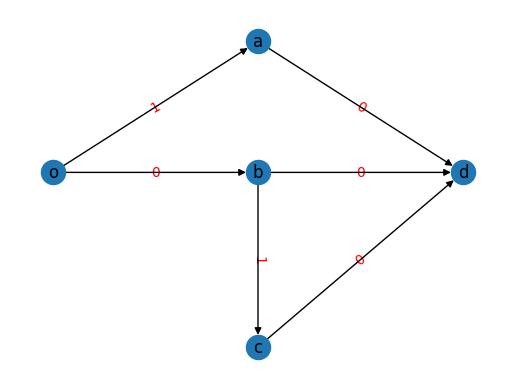

In [7]:
#This is the graph representing the residual capacities for each edge
G = nx.DiGraph()
G.add_edges_from([("o", "a"), ("a", "d"), ("o", "b"), ("b", "c"), ("b", "d"), ("c", "d")])
edge_labels = {("o", "a"):'1', ("a", "d"): '0', ("o", "b"):'0', ("b", "c"):'1', ("b", "d"):'0', ("c", "d"):'0' }
pos = {'o': (40, 20), 'a': (60, 35), 'b': (60, 20), 'd': (80, 20), 'c': (60, 0)}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color = 'red')
nx.draw(G, pos, with_labels=True)
plt.savefig("Graph3.png", format="PNG")

The maximum aggregate capacity that can be removed from the links whithout affecting the maximum throughput from o to d is 2.

### PART C

You are given x > 0 extra units of capacity. How should you distribute them in order to
maximize the throughput that can be sent from o to d?

In [8]:
'''
i create a function that, given as input a tuple containing 2 subsets U and V, returns a list of the edges that goes from U to V
'''

def edges_creator(subset_U, subset_V):
    list_output = []
    for i in subset_U:
        for j in subset_V:
            if (i,j) in list(G.edges()):
                list_output.append((i,j))
    return list_output

print(edges_creator(subset_U, subset_V))

[('a', 'd'), ('b', 'd'), ('c', 'd')]


In [9]:
#we define the capacity of the edges
G['o']['a']['capacity'] = 2
G['a']['d']['capacity'] = 1
G['o']['b']['capacity'] = 2
G['b']['d']['capacity'] = 1
G['b']['c']['capacity'] = 2
G['c']['d']['capacity'] = 1

In [10]:
counter = 1
#suppose that we want 10 additional units
n = 10
#for the plotting
added_capacity = [0]
list_min_cuts = [3]


while counter<=n:
    print('iteration: ', counter)
    min_cut, subset = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
    print('intial min_cut: ', min_cut)
    founded_bool = False
    while founded_bool==False:
        for edge in list(G.edges):
            print(edge)
            print('initial capacity of choosen node: ', G[edge[0]][edge[1]]['capacity'])
            G[edge[0]][edge[1]]['capacity'] +=1
            print('final capacity of choosen node: ', G[edge[0]][edge[1]]['capacity'])
            min_cut_new, _ = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
            print('final min cut: ', min_cut_new)
            if min_cut_new > min_cut:
                min_cut = min_cut_new
                added_capacity.append(counter)
                list_min_cuts.append(min_cut)
                founded_bool = True
                break
            else:
                G[edge[0]][edge[1]]['capacity'] -=1
                print('we restore the original capacity that is ', G[edge[0]][edge[1]]['capacity'])
            
        if founded_bool == False:
                print('not found')
                #we have iterated over all edges and no one will increase mincut
                subset_U = list(subsets[0])
                subset_V = list(subsets[1])
                #we will increase randomically one edge between those in the min_cut_edges set
                choosen_edge = random.choice(edges_creator(subset_U, subset_V))
                print('this is the random choosen edge: ', choosen_edge)
                G[choosen_edge[0]][choosen_edge[1]]['capacity'] += 1
                print('final capacity of the random choosen node: ', G[choosen_edge[0]][choosen_edge[1]]['capacity'])
                added_capacity.append(counter)
                list_min_cuts.append(min_cut)
                founded_bool = True
                
    counter += 1

print(list_min_cuts)


iteration:  1
intial min_cut:  3
('o', 'a')
initial capacity of choosen node:  2
final capacity of choosen node:  3
final min cut:  3
we restore the original capacity that is  2
('o', 'b')
initial capacity of choosen node:  2
final capacity of choosen node:  3
final min cut:  3
we restore the original capacity that is  2
('a', 'd')
initial capacity of choosen node:  1
final capacity of choosen node:  2
final min cut:  4
iteration:  2
intial min_cut:  4
('o', 'a')
initial capacity of choosen node:  2
final capacity of choosen node:  3
final min cut:  4
we restore the original capacity that is  2
('o', 'b')
initial capacity of choosen node:  2
final capacity of choosen node:  3
final min cut:  4
we restore the original capacity that is  2
('a', 'd')
initial capacity of choosen node:  2
final capacity of choosen node:  3
final min cut:  4
we restore the original capacity that is  2
('b', 'c')
initial capacity of choosen node:  2
final capacity of choosen node:  3
final min cut:  4
we rest

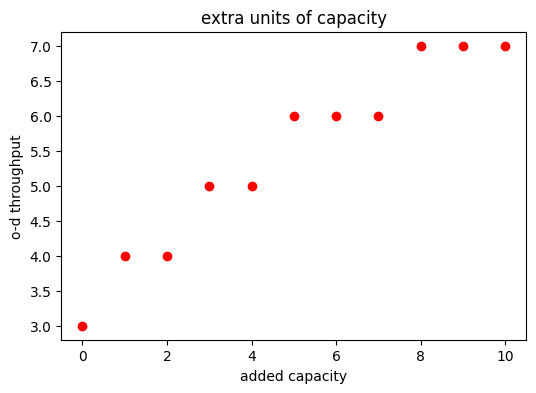

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(added_capacity, list_min_cuts, c='red', marker='o')
plt.title('extra units of capacity')
plt.xlabel('added capacity')
plt.ylabel('o-d throughput')
plt.savefig("scatter1.png", format="PNG")

## EXERCISE 2

### PART A

Firstly, we can state that exists a perfect matching by using the Hall's marriage theorem condition (necessary and sufficient), that:

$$
|\mathcal{U}| \le |\mathcal{N}_{\mathcal{U}}| \quad \forall \mathcal{U} \subseteq V_0,
$$

In our case the subset $\mathcal{U}$ is represented by the set of people and the subset $\mathcal{N}_{\mathcal{U}}$ is represented by the set of books. Because the number of books (the cardinality of the subset   $\mathcal{N}_{\mathcal{U}}$) is equals to the number of people (the cardinality of the subset $\mathcal{U}$), there exists a $\mathcal{U}$-perfect matching

To find the perfect matching by exploiting max-flow problems, we create a graph that have as nodes $\mathcal{U} \cup \mathcal{N}_{\mathcal{U}} \cup s \cup t$ and as edges all the connecting edges with capacity 1.


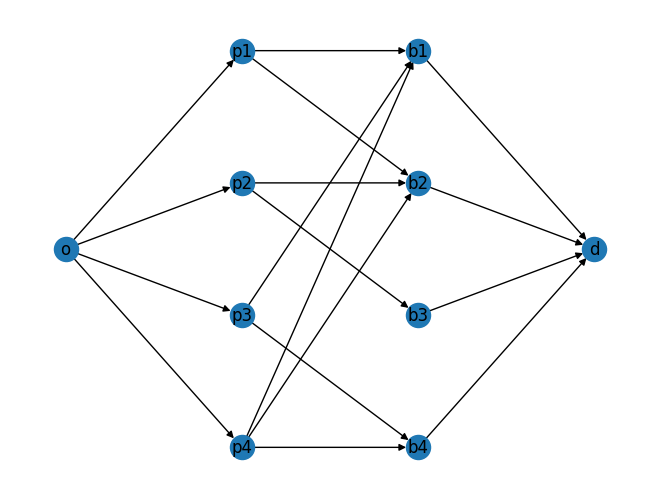

In [12]:
G = nx.DiGraph()
G.add_edges_from([('p1','b1'), ('p1','b2'), ('p2','b2'), ('p2','b3'), ('p3','b1'), ('p3','b4'), ('p4','b1'), ('p4','b2'), ('p4','b4')])
G.add_edges_from([('o','p1'), ('o','p2'), ('o','p3'), ('o', 'p4'), ('b1','d'), ('b2','d'), ('b3','d'), ('b4', 'd')])
pos = pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1], 'o':[-1,0.5], 'd':[2,0.5]}
nx.draw(G, pos, with_labels=True)

In [13]:
#i add the capacities:
G['o']['p1']['capacity'] = 1
G['o']['p2']['capacity'] = 1
G['o']['p3']['capacity'] = 1
G['o']['p4']['capacity'] = 1
G['p1']['b1']['capacity'] = 1
G['p1']['b2']['capacity'] = 1
G['p2']['b2']['capacity'] = 1
G['p2']['b3']['capacity'] = 1
G['p3']['b1']['capacity'] = 1
G['p3']['b4']['capacity'] = 1
G['p4']['b1']['capacity'] = 1
G['p4']['b2']['capacity'] = 1
G['p4']['b4']['capacity'] = 1
G['b1']['d']['capacity'] = 1
G['b2']['d']['capacity'] = 1
G['b3']['d']['capacity'] = 1
G['b4']['d']['capacity'] = 1

In [14]:
flow_value, flow_dict = nx.maximum_flow(G, "o", "d")
print(flow_value)
print(flow_dict)

4
{'p1': {'b1': 0, 'b2': 1}, 'b1': {'d': 1}, 'b2': {'d': 1}, 'p2': {'b2': 0, 'b3': 1}, 'b3': {'d': 1}, 'p3': {'b1': 1, 'b4': 0}, 'b4': {'d': 1}, 'p4': {'b1': 0, 'b2': 0, 'b4': 1}, 'o': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1}, 'd': {}}


[('p1', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p4', 'b4')]


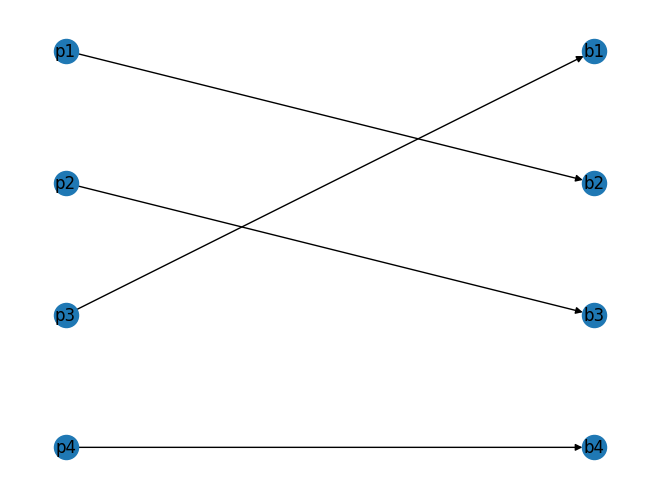

In [15]:
#we represent the graph with the perfect matching, removing the origin and destination and the corresponding edges
list_edges = []
for key,val in flow_dict.items():
    if key!='o' and key!='d':
        for el in val.items():
            if (el[0]!='o' and el[0]!='d') and el[1]>0:
                list_edges.append((key, el[0]))

print(list_edges)
G.remove_node('o')
G.remove_node('d')
nx.draw(G, pos, with_labels=True, ax=None, edgelist=list_edges) 
plt.savefig("ex2pt2.png", format="PNG")

## PART B

As the first thing we design a new graph that contains the same subsets $\mathcal{U}$ and $\mathcal{N}_{\mathcal{U}}$ and the same edges that links nodes of $\mathcal{U}$ (people) to nodes of $\mathcal{N}_{\mathcal{U}}$ (books) with capacity 1 (one person can buy only one book of a given type). In addition to that, it contains edges from the origin 'o' to the nodes of $\mathcal{U}$ with infinite capacity, and from $\mathcal{N}_{\mathcal{U}}$ to the destination 'd' with capacity equals to the number of copies available for each book 

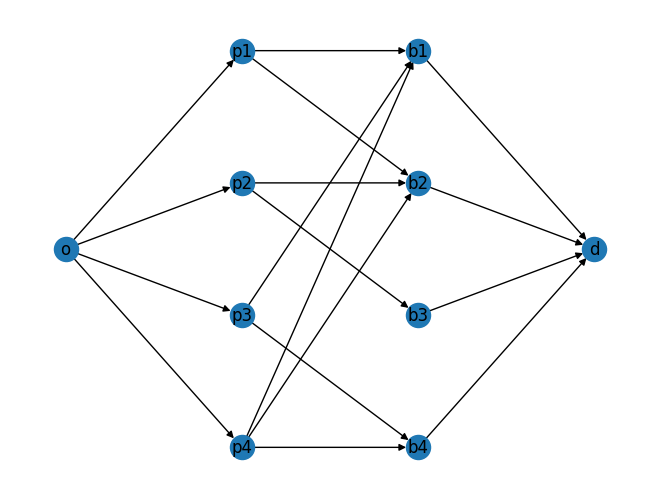

In [16]:
G = nx.DiGraph()
G.add_edges_from([('p1','b1'), ('p1','b2'), ('p2','b2'), ('p2','b3'), ('p3','b1'), ('p3','b4'), ('p4','b1'), ('p4','b2'), ('p4','b4')])
G.add_edges_from([('o','p1'), ('o','p2'), ('o','p3'), ('o', 'p4'), ('b1','d'), ('b2','d'), ('b3','d'), ('b4', 'd')])
pos = pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1], 'o':[-1,0.5], 'd':[2,0.5]}
nx.draw(G, pos, with_labels=True)

In [17]:
#i add the capacities (the edges from 'o' doesn't have one):
G['o']['p1']['capacity'] = 1000
G['o']['p2']['capacity'] = 1000
G['o']['p3']['capacity'] = 1000
G['o']['p4']['capacity'] = 1000
G['p1']['b1']['capacity'] = 1
G['p1']['b2']['capacity'] = 1
G['p2']['b2']['capacity'] = 1
G['p2']['b3']['capacity'] = 1
G['p3']['b1']['capacity'] = 1
G['p3']['b4']['capacity'] = 1
G['p4']['b1']['capacity'] = 1
G['p4']['b2']['capacity'] = 1
G['p4']['b4']['capacity'] = 1
G['b1']['d']['capacity'] = 2
G['b2']['d']['capacity'] = 3
G['b3']['d']['capacity'] = 2
G['b4']['d']['capacity'] = 2

In [18]:
flow_value, flow_dict = nx.maximum_flow(G, "o", "d")
print(flow_value)
print(flow_dict)

8
{'p1': {'b1': 0, 'b2': 1}, 'b1': {'d': 2}, 'b2': {'d': 3}, 'p2': {'b2': 1, 'b3': 1}, 'b3': {'d': 1}, 'p3': {'b1': 1, 'b4': 1}, 'b4': {'d': 2}, 'p4': {'b1': 1, 'b2': 1, 'b4': 1}, 'o': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3}, 'd': {}}


The total number of book of interest that can be assigned is equals to 8, below there is the graph with the relationships between people's nodes and book's nodes

[('p1', 'b2'), ('p2', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'), ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4')]


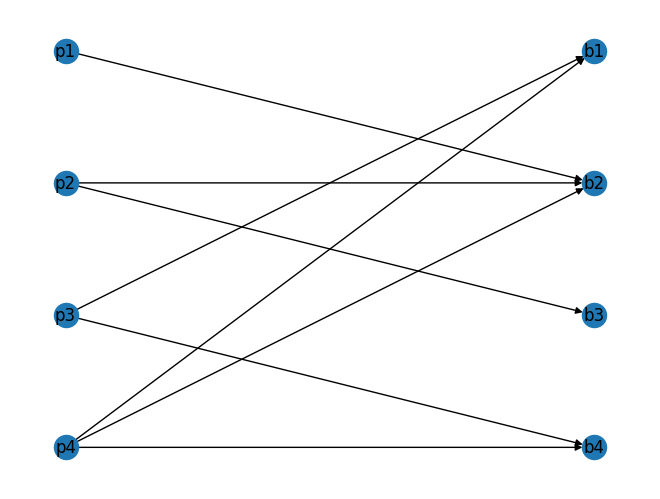

In [19]:
list_edges = []
for key,val in flow_dict.items():
    if key!='o' and key!='d':
        for el in val.items():
            if (el[0]!='o' and el[0]!='d') and el[1]>0:
                list_edges.append((key, el[0]))

print(list_edges)
G.remove_node('o')
G.remove_node('d')
nx.draw(G, pos, with_labels=True, ax=None, edgelist=list_edges) 
plt.savefig("ex2pt3.png", format="PNG")

In [20]:
cap = G['p1']['b1']['capacity']
cap

1

### PART C

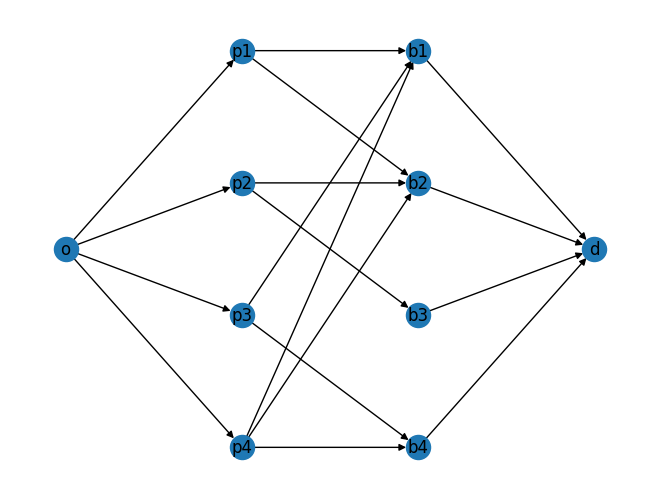

In [21]:
G = nx.DiGraph()
G.add_edges_from([('p1','b1'), ('p1','b2'), ('p2','b2'), ('p2','b3'), ('p3','b1'), ('p3','b4'), ('p4','b1'), ('p4','b2'), ('p4','b4')])
G.add_edges_from([('o','p1'), ('o','p2'), ('o','p3'), ('o', 'p4'), ('b1','d'), ('b2','d'), ('b3','d'), ('b4', 'd')])
pos = pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1], 'o':[-1,0.5], 'd':[2,0.5]}
nx.draw(G, pos, with_labels=True)

Supposing that the library can sell a copy of a book and buy a copy of another book means that i no longer have capacity constraint like in part B (2,3,2,2) but we have to maintain the total capacity of 9 books available in the library (if the library buys one book they need to sell consequencially and vice versa). Then we create a graph with the same subsets $\mathcal{U}$ and $\mathcal{N}_{\mathcal{U}}$ with their edges of capacity 1 as previously. The source node 'o' will be linked to the nodes $\mathcal{U}$ with infinite capacity as before, and the nodes of $\mathcal{N}_{\mathcal{U}}$ will be linked to a new node 'n' with edges of infinite capacity, this edge will be linked to the source 'd' with a capacity of 9, the total constraint on the availability of books that we need to maintain.

In [22]:
#i add the capacities (the edges from 'o' doesn't have one):
G['o']['p1']['capacity'] = 1000
G['o']['p2']['capacity'] = 1000
G['o']['p3']['capacity'] = 1000
G['o']['p4']['capacity'] = 1000
G['p1']['b1']['capacity'] = 1
G['p1']['b2']['capacity'] = 1
G['p2']['b2']['capacity'] = 1
G['p2']['b3']['capacity'] = 1
G['p3']['b1']['capacity'] = 1
G['p3']['b4']['capacity'] = 1
G['p4']['b1']['capacity'] = 1
G['p4']['b2']['capacity'] = 1
G['p4']['b4']['capacity'] = 1
G['b1']['d']['capacity'] = 2
G['b2']['d']['capacity'] = 3
G['b3']['d']['capacity'] = 2
G['b4']['d']['capacity'] = 2

In [23]:
from networkx.algorithms.flow import edmonds_karp
R = edmonds_karp(G, "o", "d")
max_removable_capacity = 0

for tail, head in G.edges:
        G[tail][head]['residual_capacity'] = G[tail][head]['capacity'] - R[tail][head]['flow']

for edge in G.edges:
        print(edge)
        print(G[edge[0]][edge[1]]['residual_capacity'])

('p1', 'b1')
0
('p1', 'b2')
0
('b1', 'd')
0
('b2', 'd')
0
('p2', 'b2')
0
('p2', 'b3')
0
('b3', 'd')
1
('p3', 'b1')
0
('p3', 'b4')
0
('b4', 'd')
0
('p4', 'b1')
1
('p4', 'b2')
0
('p4', 'b4')
0
('o', 'p1')
998
('o', 'p2')
998
('o', 'p3')
998
('o', 'p4')
998


We can see that there is one residual capacity that is in the edge ('b3', 'd'), this means that there is one book of type b3 that has not been bought, also there is another residual capacity that is in the edge ('p4', 'b1'), this means that p4 wants to read b1 but there are no more copies available.

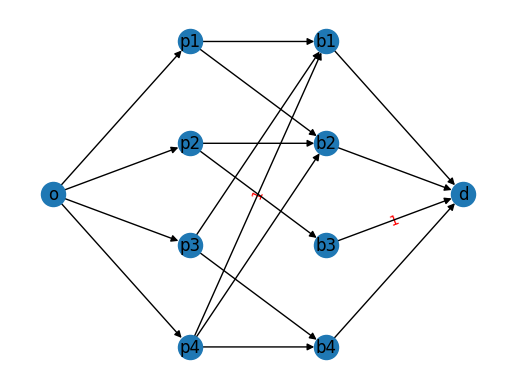

In [24]:
#representation of the residual capacities:
edge_labels = {('p4', 'b1'):'1', ('b3', 'd'):'1'}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color = 'red')
nx.draw(G, pos, with_labels=True)

## EXERCISE 3

### PART A

In [25]:
#! pip install scipy
import math
import scipy.io
import numpy as np

#vector with the flow for each vector (array)
f_vect = scipy.io.loadmat('flow (2).mat')['flow'].reshape(28,)
#maximum flow capacity vector (array)
C = scipy.io.loadmat('capacities (2).mat')['capacities'].reshape(28,)
#node-link incidence matrix (ndarray)
B = scipy.io.loadmat('traffic (2).mat')['traffic']
#minimum traveling time vector (which the drivers experience when the road is empty) (array)
l = scipy.io.loadmat('traveltime.mat')['traveltime'].reshape(28,)

In [26]:
type(B)

numpy.ndarray

In [27]:
#the node incidence matrix where the rows are the nodes and the columns are the edges:
print(B.shape)

(17, 28)


In [28]:
#the capacity vector:
print(C)
C.shape

[ 8741  9864 13350 10926 13707  6960  7422  6678  6297 11102  8899  8970
  9753  9719  9083  7416 13353 11216 10947 10019  8732 10763  6677  9403
 10355  9067 11990  8258]


(28,)

In [29]:
#minimum travelling time, which the drivers experience when the road is empty
print(l)
l.shape

[0.14583  0.044833 0.129    0.18667  0.12983  0.078333 0.094    0.057333
 0.14167  0.10517  0.10667  0.10483  0.11233  0.1805   0.1215   0.080667
 0.075333 0.056667 0.032667 0.035    0.066667 0.11283  0.078333 0.054167
 0.095833 0.073    0.165    0.14867 ]


(28,)

In [30]:
#flow across each edge:
print(f_vect)

[ 7524  6537 11139  9282  9282  6398  6728  5988  5951  9557  7423  7423
  6814  8536  7652  6537 11924  9640  8161  8603  7974  9446  5562  6719
  9455  6686 10833  7403]


In [31]:
import pandas as pd

#we will use the node link matrix B to create the directed graph
B_df = pd.DataFrame(B, index=[i for i in range(1,18)], columns=[f'e{i}' for i in range(1,29)])
print(B_df)

    e1  e2  e3  e4  e5  e6  e7  e8  e9  e10  ...  e19  e20  e21  e22  e23  \
1    1   0   0   0   1   0   0   0   0    0  ...    0    0    0    0    0   
2   -1   1   0   0   0   0   0   0   0    1  ...    0    0    0    0    0   
3    0  -1   1   0   0   0   0   0   0    0  ...    0    0    0    0    0   
4    0   0  -1   1   0   0   0   0   0    0  ...    0    0    0    0    0   
5    0   0   0  -1   0   0   0   0   0    0  ...    0    0    0    0    0   
6    0   0   0   0  -1   1   0   0   0    0  ...    0    0    0    0    0   
7    0   0   0   0   0  -1   1   0   0   -1  ...    0    0    0    0    0   
8    0   0   0   0   0   0  -1   1   0    0  ...    1    0    0    0    0   
9    0   0   0   0   0   0   0  -1   1    0  ...    0    1    0    0    0   
10   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0   
11   0   0   0   0   0   0   0   0   0    0  ...   -1    0    1    0    0   
12   0   0   0   0   0   0   0   0   0    0  ...    0   -1   -1    1    0   

In [32]:
#i create a directed graph G that will contain nodes and edges with their capacity, min_travel_time and flow

G = nx.DiGraph()

for n, column in enumerate(B_df):
    tail = ''
    head = ''
    for num, i in enumerate(B_df[column]):
        if i==-1:
            head = num+1
        elif i==1:
            tail = num+1
    G.add_edge(tail,head)
    #we add the resources linked to each graph:
    G[tail][head]['capacity'] = C[n]
    G[tail][head]['min_travel_time'] = l[n]
    G[tail][head]['flow'] = f_vect[n]

print(dict(G.edges()))

{(1, 2): {'capacity': 8741, 'min_travel_time': 0.14583, 'flow': 7524}, (1, 6): {'capacity': 13707, 'min_travel_time': 0.12983, 'flow': 9282}, (2, 3): {'capacity': 9864, 'min_travel_time': 0.044833, 'flow': 6537}, (2, 7): {'capacity': 11102, 'min_travel_time': 0.10517, 'flow': 9557}, (3, 4): {'capacity': 13350, 'min_travel_time': 0.129, 'flow': 11139}, (3, 8): {'capacity': 8899, 'min_travel_time': 0.10667, 'flow': 7423}, (3, 9): {'capacity': 8970, 'min_travel_time': 0.10483, 'flow': 7423}, (4, 5): {'capacity': 10926, 'min_travel_time': 0.18667, 'flow': 9282}, (4, 9): {'capacity': 9753, 'min_travel_time': 0.11233, 'flow': 6814}, (5, 14): {'capacity': 9719, 'min_travel_time': 0.1805, 'flow': 8536}, (6, 7): {'capacity': 6960, 'min_travel_time': 0.078333, 'flow': 6398}, (6, 10): {'capacity': 9083, 'min_travel_time': 0.1215, 'flow': 7652}, (7, 8): {'capacity': 7422, 'min_travel_time': 0.094, 'flow': 6728}, (7, 10): {'capacity': 11216, 'min_travel_time': 0.056667, 'flow': 9640}, (8, 9): {'cap

In [33]:
! pip install cvxpy

In [34]:
import cvxpy as cp
#build the exogenous flow vector: one units of flow enter in the origin and exits in the destination node
nu = np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1])

#l stores the coefficients of the linear terms of the objective function, it will be our array of minimum travel time
f = cp.Variable(28)
objective = cp.Minimize(l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

result = prob.solve()
print("Optimal f:", f.value)
print("Optimal cost:", result)
#all the flow is sent on l1,l2,l9,l12,l25

Optimal f: [1.00000000e+00 1.00000000e+00 1.19595586e-11 5.07129566e-12
 1.49988426e-10 1.33658919e-10 8.54100951e-11 3.78266693e-11
 9.99999998e-01 8.90389208e-12 3.91753215e-11 1.00000000e+00
 6.88981434e-12 5.07752202e-12 1.62878397e-11 5.42208640e-11
 1.91831469e-11 5.71274798e-11 8.67469798e-11 1.99611946e-09
 1.29358670e-10 2.12547935e-09 4.14939343e-11 1.16133834e-11
 1.00000000e+00 4.65871714e-11 3.08330688e-11 3.08494486e-11]
Optimal cost: 0.532996000033922


### PART B

In [35]:
#want to find the maximum flow between node 1 and node 17, i use the graph G done previously
flow_value, flow_dict = nx.maximum_flow(G, 1, 17)
print(flow_value)
print(flow_dict)

22448
{1: {2: 8741, 6: 13707}, 2: {3: 8741, 7: 0}, 3: {4: 0, 8: 0, 9: 8741}, 4: {5: 0, 9: 0}, 5: {14: 0}, 6: {7: 4624, 10: 9083}, 7: {8: 4624, 10: 0}, 8: {9: 4624, 11: 0}, 9: {13: 6297, 12: 7068}, 13: {14: 3835, 17: 10355}, 14: {17: 3835}, 10: {11: 825, 15: 8258}, 11: {12: 825, 15: 0}, 15: {16: 8258}, 12: {13: 7893}, 17: {}, 16: {17: 8258}}


### PART C

In [36]:
#we have the node link incidence matrix B and the flow vector f_vect, then the external inflow will be:
v = B @ f_vect
print(v)

[ 16806   8570  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


### PART D

In [37]:
import numpy as np
#now the exogenous inflow will be 16806 for node 1 and -16806 for node 17, others will be 0
nu = np.array([16806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-16806])

f = cp.Variable(28)

objective = cp.Minimize(cp.sum((cp.multiply(cp.inv_pos(1-cp.multiply(f, cp.inv_pos(C))), cp.multiply(l,C)))-cp.multiply(l,C)))
constraints = [B @ f == nu, f >=0]
problem = cp.Problem(objective, constraints)
min_val = problem.solve()
flow_values = f.value
f.value

array([6.64230051e+03, 6.05889802e+03, 3.13240161e+03, 3.13240145e+03,
       1.01636995e+04, 4.63840047e+03, 3.00636212e+03, 2.54258815e+03,
       3.13151936e+03, 5.83402485e+02, 1.26113499e-03, 2.92649515e+03,
       1.56756001e-04, 3.13240145e+03, 5.52529902e+03, 2.85430437e+03,
       4.88643549e+03, 2.21544084e+03, 4.63775232e+02, 2.33756409e+03,
       3.31807944e+03, 5.65564353e+03, 2.37304293e+03, 1.63316053e-04,
       6.41411997e+03, 5.50544438e+03, 4.88643565e+03, 4.88643565e+03])

In [38]:
so_cost = min_val
f_so = flow_values
print(so_cost)

25943.621934951483


# PART E

In [39]:
nu = np.array([16806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-16806])

f = cp.Variable(28)

objective = cp.Minimize(cp.sum(cp.multiply(cp.multiply(-l, C), cp.log(1-(cp.multiply(f, cp.inv_pos(C))))) ))
constraints = [B @ f == nu, f >=0]
problem = cp.Problem(objective, constraints)
min_val = problem.solve()
flow_values = f.value
f.value

array([6.71564829e+03, 6.71564741e+03, 2.36740739e+03, 2.36740731e+03,
       1.00903516e+04, 4.64539488e+03, 2.80384250e+03, 2.28356153e+03,
       3.41848000e+03, 8.78819518e-04, 1.76829148e+02, 4.17141087e+03,
       7.86356185e-05, 2.36740731e+03, 5.44495677e+03, 2.35317159e+03,
       4.93333843e+03, 1.84155326e+03, 6.97110115e+02, 3.03649247e+03,
       3.05028160e+03, 6.08677407e+03, 2.58651170e+03, 1.08862333e-04,
       6.91874238e+03, 4.95391901e+03, 4.93333854e+03, 4.93333854e+03])

In [40]:
#compute the delay for each edge:
def compute_delay(l,f,C):
    list_out = []
    for (l_el,f_el,C_el) in zip(l,f,C):
        list_out.append(l_el/(1-f_el/C_el))
    return(np.array(list_out))

delay_vect = compute_delay(l,flow_values,C)
delay_vect

array([0.62937218, 0.1404648 , 0.15680724, 0.23830512, 0.49205221,
       0.23554674, 0.15107064, 0.08712598, 0.30991481, 0.10517001,
       0.10883258, 0.19595866, 0.11233   , 0.23862577, 0.30334563,
       0.11816053, 0.11947292, 0.06779889, 0.03488873, 0.0502205 ,
       0.10245778, 0.25969432, 0.12786479, 0.054167  , 0.28878822,
       0.16092341, 0.28035212, 0.36927575])

In [41]:
#the social cost under Wardrop equilibrium will be:
cost_arr = flow_values*delay_vect
print(delay_vect)
cost_w = sum(cost_arr)
cost_w

[0.62937218 0.1404648  0.15680724 0.23830512 0.49205221 0.23554674
 0.15107064 0.08712598 0.30991481 0.10517001 0.10883258 0.19595866
 0.11233    0.23862577 0.30334563 0.11816053 0.11947292 0.06779889
 0.03488873 0.0502205  0.10245778 0.25969432 0.12786479 0.054167
 0.28878822 0.16092341 0.28035212 0.36927575]


26292.963732052354

In [42]:
#the price of anarchy will be the wardrop cost divided by the SO-TAP cost calculated before
price_anarchy = cost_w/so_cost
price_anarchy

1.013465421211301

In [43]:
#the toll part:

nu = np.array([16806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-16806])

f = cp.Variable(28)

objective = cp.Minimize(cp.sum(cp.multiply(cp.multiply(cp.multiply(cp.multiply(C,l), f_so), cp.inv_pos(cp.power((C-f_so), 2))), f) - cp.multiply(cp.multiply(l, C), cp.log(1-(cp.multiply(f, cp.inv_pos(C)))))             ))
constraints = [B @ f == nu, f >=0]
problem = cp.Problem(objective, constraints)
min_valE = problem.solve()
flow_ward_tolls = f.value
f.value

array([6.64230468e+03, 6.05906999e+03, 3.13229874e+03, 3.13229865e+03,
       1.01636952e+04, 4.63801369e+03, 3.00624951e+03, 2.54244517e+03,
       3.13154097e+03, 5.83234693e+02, 3.45598812e-04, 2.92677090e+03,
       9.40191904e-05, 3.13229865e+03, 5.52568152e+03, 2.85425150e+03,
       4.88642889e+03, 2.21499887e+03, 4.63804687e+02, 2.33767519e+03,
       3.31805607e+03, 5.65573126e+03, 2.37316586e+03, 1.20959775e-04,
       6.41410637e+03, 5.50546451e+03, 4.88642901e+03, 4.88642901e+03])

In [44]:
#create the new delay function:
def compute_delay_2(l,f,C,f_opt):
    list_out = []
    for (l_el,f_el,C_el, f_c) in zip(l,f,C,f_opt):
        list_out.append( ((f_c*C_el*l_el)/(C_el-f_c)**2) + (l_el/(1-(f_el/C_el)))   )
    return(np.array(list_out))


In [45]:
delay_vect_2 = compute_delay(l,flow_ward_tolls,C)
cost_arr_2 = flow_ward_tolls*delay_vect_2
cost_w = sum(cost_arr_2)
cost_w

25943.621463166437

## PART F

In [46]:
nu = np.array([16806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-16806])

f = cp.Variable(28)

objective = cp.Minimize(cp.sum(cp.multiply(cp.multiply(l,C), cp.inv_pos(1-cp.multiply(f, cp.inv_pos(C))))- cp.multiply((C+f), l) ))
constraints = [B @ f == nu, f >=0]
problem = cp.Problem(objective, constraints)
min_valF = problem.solve()
f_so_2 = f.value
f.value 

array([6.65326049e+03, 5.77465810e+03, 3.41974720e+03, 3.41974127e+03,
       1.01527395e+04, 4.64270104e+03, 3.10584825e+03, 2.66217967e+03,
       3.00906114e+03, 8.78602390e+02, 7.47261013e-03, 2.35490342e+03,
       5.93671883e-03, 3.41974127e+03, 5.51003847e+03, 3.04369304e+03,
       4.88180062e+03, 2.41545518e+03, 4.43676052e+02, 2.00802789e+03,
       3.48736711e+03, 5.49539501e+03, 2.20377719e+03, 1.97379951e-03,
       6.30067895e+03, 5.62351846e+03, 4.88180259e+03, 4.88180259e+03])

In [47]:
#the cost of the social optimum will be:
min_valF 

15095.51351366532

In [48]:
#now we find the vector of tolls that makes the Wardrop equilibrium coincide with the social optimum
omega = cp.multiply(f_so_2, cp.multiply(cp.multiply(C,l), cp.inv_pos(cp.power((C-f_so_2),2)))) -l
print(omega.value)

[ 1.79993283  0.10787799 -0.06927662 -0.06288104  1.30038789  0.39303553
  0.02231497  0.00587032  0.10664053 -0.09535489 -0.10666991 -0.05422671
 -0.11232993 -0.02931345  0.35482518  0.01457866 -0.00690177 -0.03684497
 -0.03122881 -0.02402785  0.00713908  0.12767851 -0.02072898 -0.05416699
  0.28454577  0.24090561  0.02614563  0.37713265]


In [49]:
sub_1= - cp.multiply(l,C)
sub_2= cp.multiply(sub_1, cp.log(C-f))
sub_3=cp.multiply(omega,f)
objective= cp.Minimize(cp.sum(sub_2+sub_3))
problem=cp.Problem(objective,constraints).solve()
vect_ward = f.value
print(f.value)

[6.65336598e+03 5.77546849e+03 3.41941782e+03 3.41941652e+03
 1.01526339e+04 4.64273344e+03 3.10549439e+03 2.66172892e+03
 3.00921686e+03 8.77897488e+02 1.60401082e-03 2.35604907e+03
 1.30333773e-03 3.41941652e+03 5.50990049e+03 3.04332449e+03
 4.88171253e+03 2.41513654e+03 4.43767068e+02 2.00856243e+03
 3.48709099e+03 5.49565343e+03 2.20402891e+03 5.70695022e-04
 6.30084138e+03 5.62344543e+03 4.88171310e+03 4.88171310e+03]


In [50]:
#compute the difference between the social optimum flow vector and Wardrop equilibrium
diff = np.linalg.norm(f_so_2-vect_ward)
print(diff)

1.9934614334263365
